In [1]:
import pandas as pd
import talib
import numpy as np
import mplfinance as mpf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("pattern_test.csv",low_memory=False)

In [3]:
import datetime
def read_binance_data(df):
    def to_date(date):
        try:
            return datetime.datetime.strptime(date, '%Y-%m-%d %I-%p')
        except:
            return datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S')

    df.reset_index(inplace=True)
    df['date'] = df['date'].apply(lambda x: to_date(x))
    return df

In [4]:
pattern_list ="""CDL2CROWS
CDL3BLACKCROWS
CDL3INSIDE
CDL3LINESTRIKE
CDL3OUTSIDE
CDL3STARSINSOUTH
CDL3WHITESOLDIERS
CDLABANDONEDBABY
CDLADVANCEBLOCK
CDLBELTHOLD
CDLBREAKAWAY
CDLCLOSINGMARUBOZU
CDLCONCEALBABYSWALL
CDLCOUNTERATTACK
CDLDARKCLOUDCOVER
CDLDOJI
CDLDOJISTAR
CDLDRAGONFLYDOJI
CDLENGULFING
CDLEVENINGDOJISTAR
CDLEVENINGSTAR
CDLGAPSIDESIDEWHITE
CDLGRAVESTONEDOJI
CDLHAMMER
CDLHANGINGMAN
CDLHARAMI
CDLHARAMICROSS
CDLHIGHWAVE
CDLHIKKAKE
CDLHIKKAKEMOD
CDLHOMINGPIGEON
CDLIDENTICAL3CROWS
CDLINNECK
CDLINVERTEDHAMMER
CDLKICKING
CDLKICKINGBYLENGTH
CDLLADDERBOTTOM
CDLLONGLEGGEDDOJI
CDLLONGLINE
CDLMARUBOZU
CDLMATCHINGLOW
CDLMATHOLD
CDLMORNINGDOJISTAR
CDLMORNINGSTAR
CDLONNECK
CDLPIERCING
CDLRICKSHAWMAN
CDLRISEFALL3METHODS
CDLSEPARATINGLINES
CDLSHOOTINGSTAR
CDLSHORTLINE
CDLSPINNINGTOP
CDLSTALLEDPATTERN
CDLSTICKSANDWICH
CDLTAKURI
CDLTASUKIGAP
CDLTHRUSTING
CDLTRISTAR
CDLUNIQUE3RIVER
CDLUPSIDEGAP2CROWS
CDLXSIDEGAP3METHODS""".split("\n")

In [5]:
df = read_binance_data(df)

In [6]:
df.head()

,index,date,unix,symbol,open,high,low,close,Volume ETH,Volume USDT,...,CDLSPINNINGTOP_test,CDLSTALLEDPATTERN_test,CDLSTICKSANDWICH_test,CDLTAKURI_test,CDLTASUKIGAP_test,CDLTHRUSTING_test,CDLTRISTAR_test,CDLUNIQUE3RIVER_test,CDLUPSIDEGAP2CROWS_test,CDLXSIDEGAP3METHODS_test
0,0,2017-08-17 04:00:00,1.502942e+09,ETH/USDT,652.74,652.74,298.0,300.79,122.52,36736.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2017-08-17 05:00:00,1.502946e+09,ETH/USDT,301.61,303.28,300.0,303.10,377.67,114043.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2017-08-17 06:00:00,1.502950e+09,ETH/USDT,303.10,304.44,301.9,302.68,302.51,91622.68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2017-08-17 07:00:00,1.502953e+09,ETH/USDT,302.68,307.96,302.6,307.96,753.19,229248.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2017-08-17 08:00:00,1.502957e+09,ETH/USDT,307.96,309.97,307.0,308.62,150.75,46559.46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
len(df)

40112

In [8]:
for p in pattern_list:
    
    T = len(df[df[f"{p}_test"] ==True])
    F = len(df[df[f"{p}_test"] ==False])
    if T != 0 and F != 0:
        print(p)
        print("False = ",F)
        print("True = ",T)
        print("True pct = " , T/(T+F))
        print("\n")

CDL3INSIDE
False =  27
True =  21
True pct =  0.4375


CDL3LINESTRIKE
False =  10
True =  13
True pct =  0.5652173913043478


CDL3OUTSIDE
False =  122
True =  65
True pct =  0.34759358288770054


CDL3WHITESOLDIERS
False =  14
True =  3
True pct =  0.17647058823529413


CDLBELTHOLD
False =  2328
True =  872
True pct =  0.2725


CDLCLOSINGMARUBOZU
False =  1659
True =  606
True pct =  0.2675496688741722


CDLDOJI
False =  4714
True =  1669
True pct =  0.2614757950806831


CDLDOJISTAR
False =  26
True =  15
True pct =  0.36585365853658536


CDLDRAGONFLYDOJI
False =  578
True =  213
True pct =  0.2692793931731985


CDLENGULFING
False =  224
True =  139
True pct =  0.38292011019283745


CDLGAPSIDESIDEWHITE
False =  4
True =  6
True pct =  0.6


CDLGRAVESTONEDOJI
False =  533
True =  175
True pct =  0.24717514124293785


CDLHAMMER
False =  717
True =  270
True pct =  0.2735562310030395


CDLHARAMI
False =  117
True =  76
True pct =  0.39378238341968913


CDLHARAMICROSS
False =  30
True =  15

### test CDL3LINESTRIKE

In [29]:
pettern = "CDLHIKKAKE" #0.3050605844618674

In [30]:
from talib import *
import numpy as np

In [11]:
def volatility(data,col):
    log_returns = np.log(data[col]/data[col].shift())
    v = log_returns.std()*len(data)**.5
    return v



In [31]:
df = pd.read_csv("pattern_test.csv",low_memory=False)
df = read_binance_data(df)
close = df.close
high = df.high
low = df.low
open = df.open
df["ema_1"] = EMA(close,timeperiod=32)
df["ema_2"] = EMA(close,timeperiod=16)
df["ema_3"] = EMA(close,timeperiod=8)




data = df.iloc[30:]

In [32]:
data.head()

,index,date,unix,symbol,open,high,low,close,Volume ETH,Volume USDT,...,CDLTAKURI_test,CDLTASUKIGAP_test,CDLTHRUSTING_test,CDLTRISTAR_test,CDLUNIQUE3RIVER_test,CDLUPSIDEGAP2CROWS_test,CDLXSIDEGAP3METHODS_test,ema_1,ema_2,ema_3
30,30,2017-08-18 10:00:00,1.503050e+09,ETH/USDT,304.71,311.06,304.71,308.88,332.47,102089.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305.065331,305.425332
31,31,2017-08-18 11:00:00,1.503054e+09,ETH/USDT,308.88,311.79,306.27,307.78,261.15,80940.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305.843437,305.384704,305.948591
32,32,2017-08-18 12:00:00,1.503058e+09,ETH/USDT,307.78,310.29,305.73,308.47,382.69,117917.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,306.002623,305.747680,306.508904
33,33,2017-08-18 13:00:00,1.503061e+09,ETH/USDT,308.47,309.66,301.30,303.22,336.87,102929.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305.833979,305.450306,305.778037
34,34,2017-08-18 14:00:00,1.503065e+09,ETH/USDT,303.22,303.22,296.32,298.52,393.35,117787.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305.390708,304.634976,304.165140


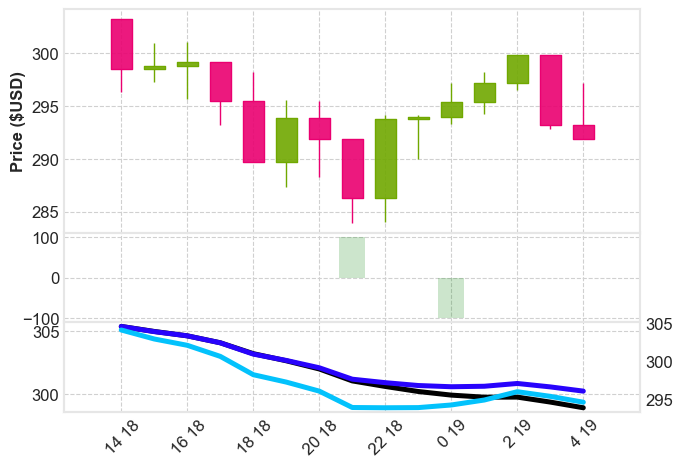

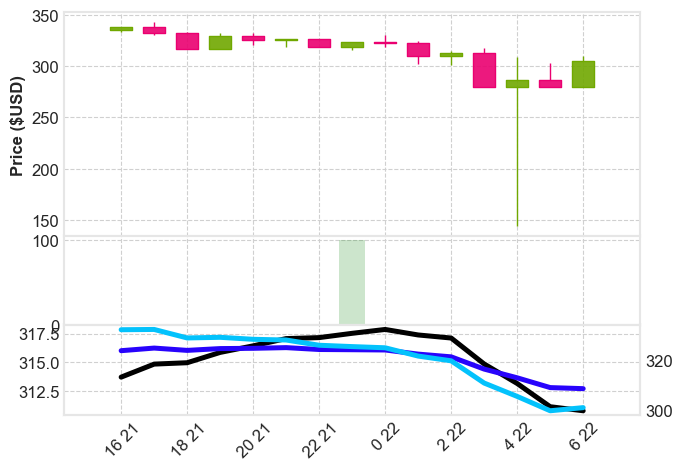

--------------------
--------------------


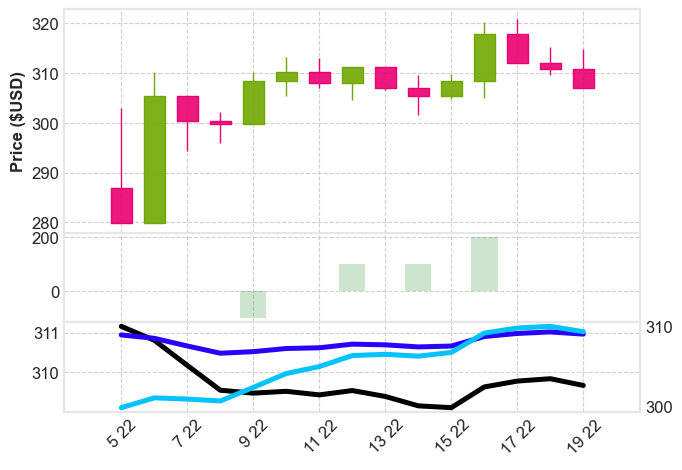

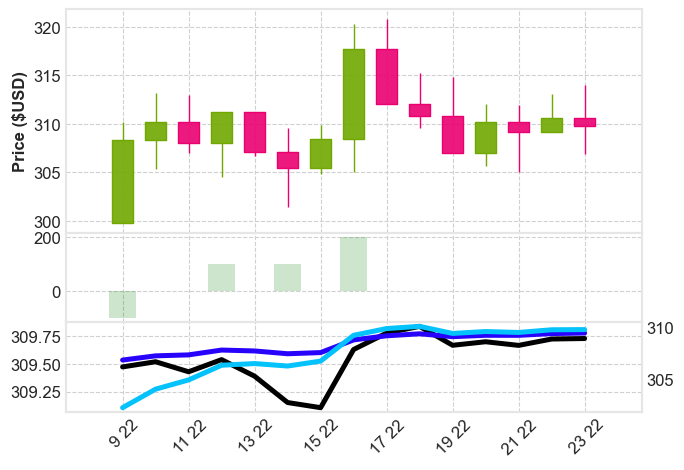

--------------------
--------------------


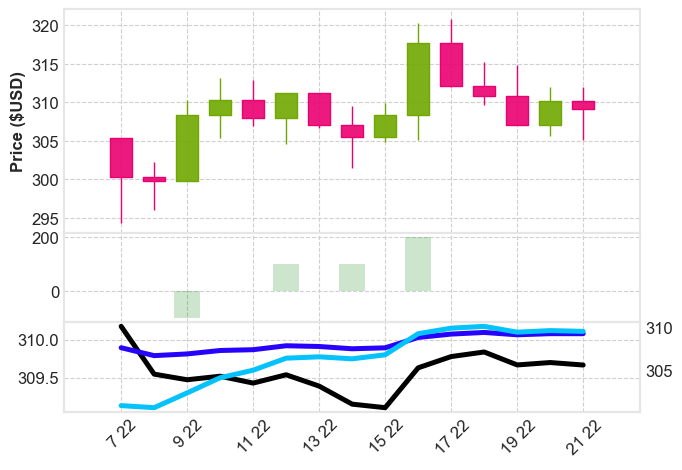

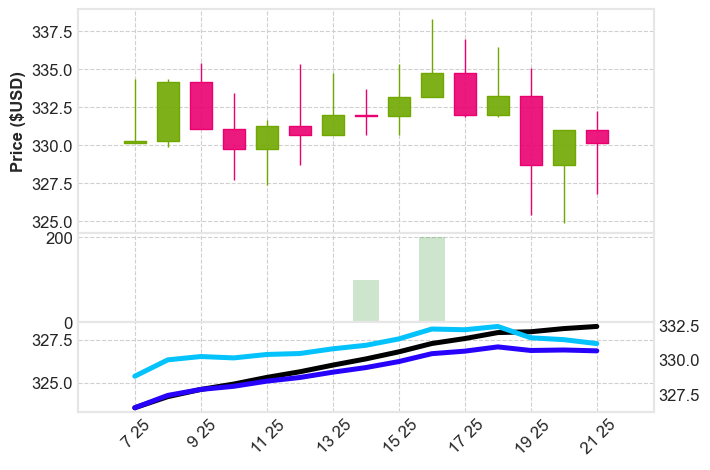

--------------------
--------------------


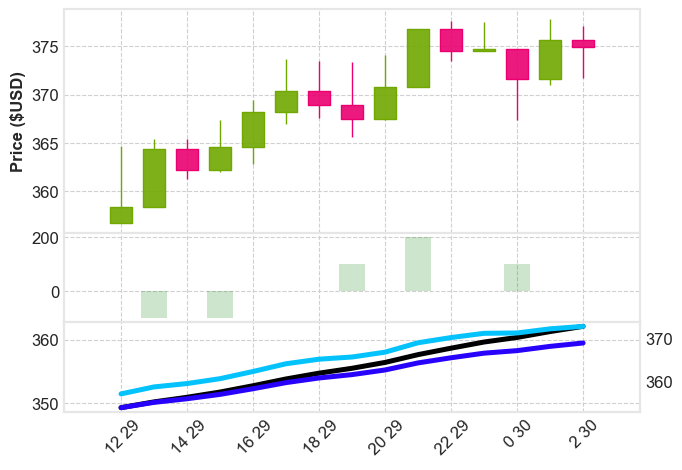

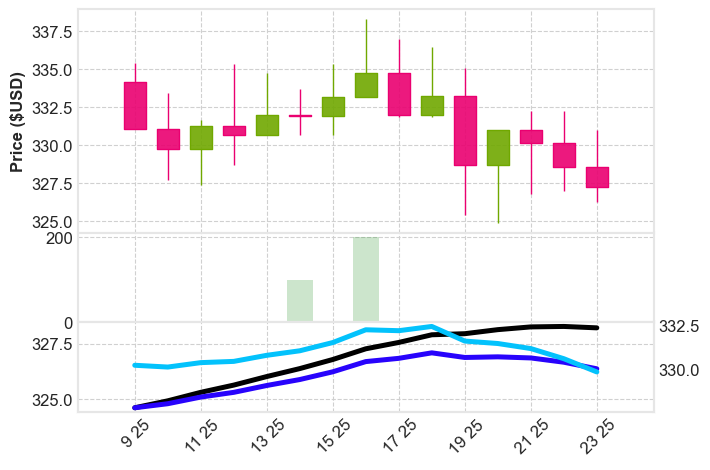

--------------------
--------------------


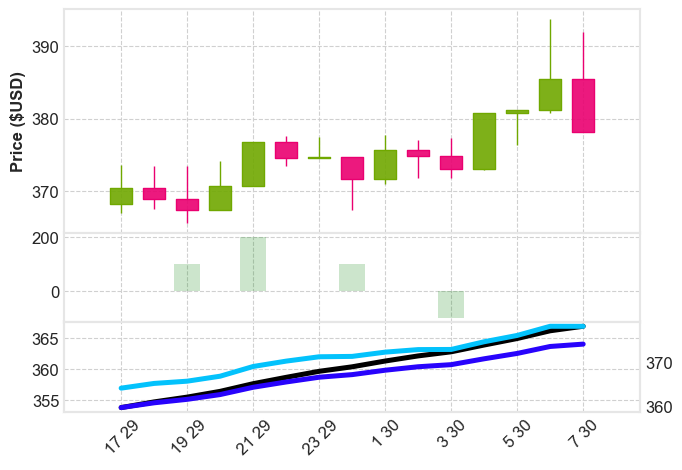

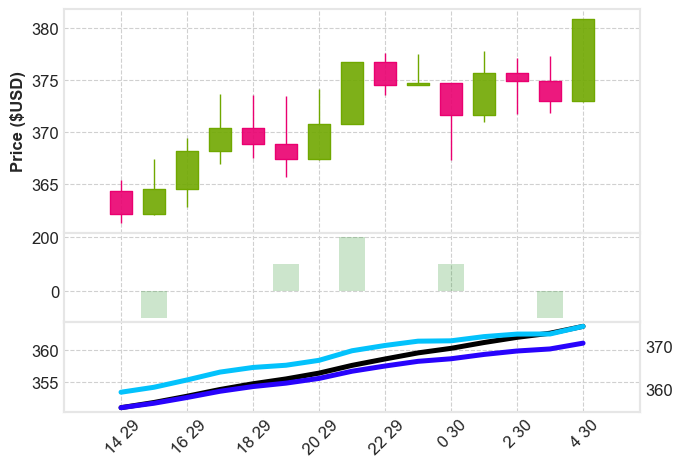

--------------------
--------------------


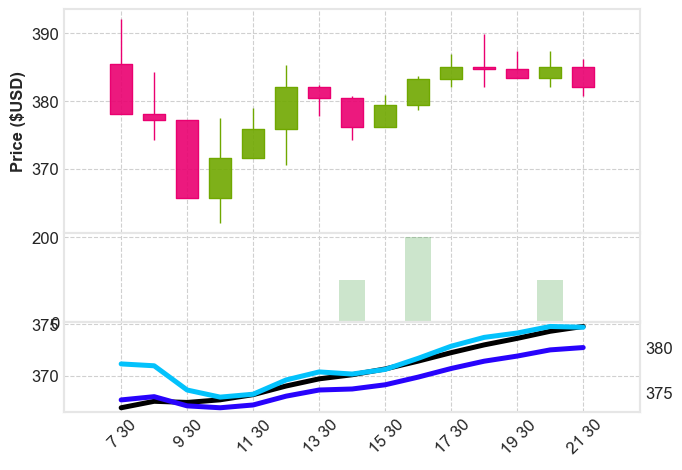

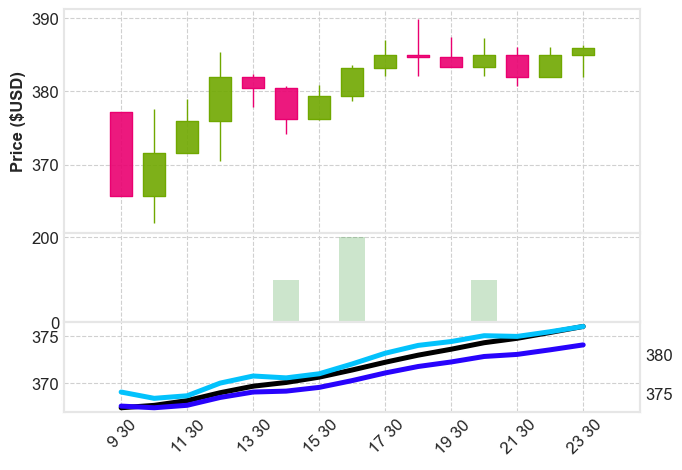

--------------------
--------------------


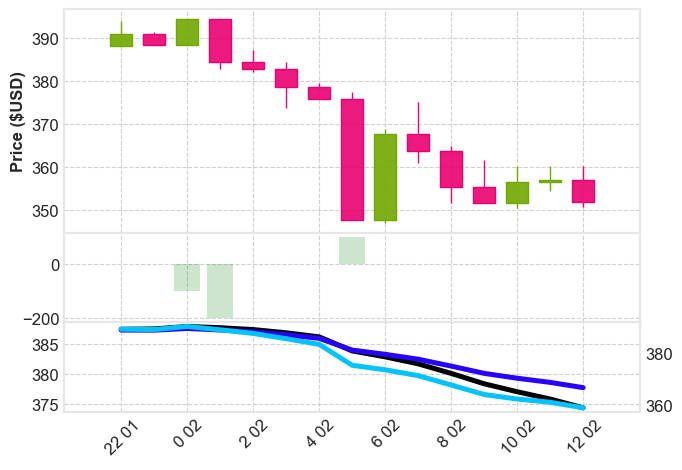

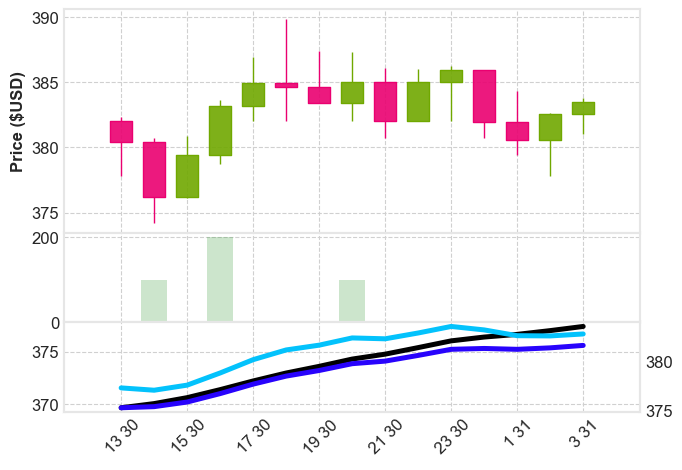

--------------------
--------------------


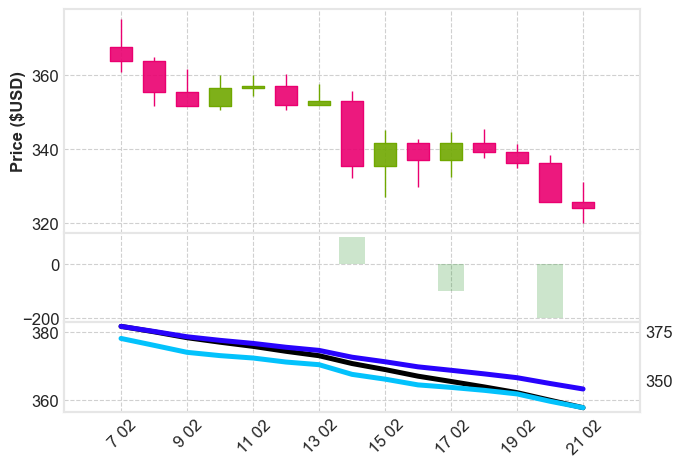

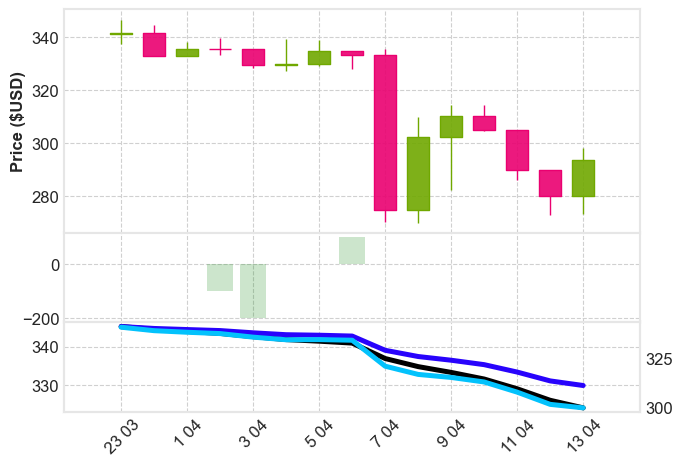

--------------------
--------------------


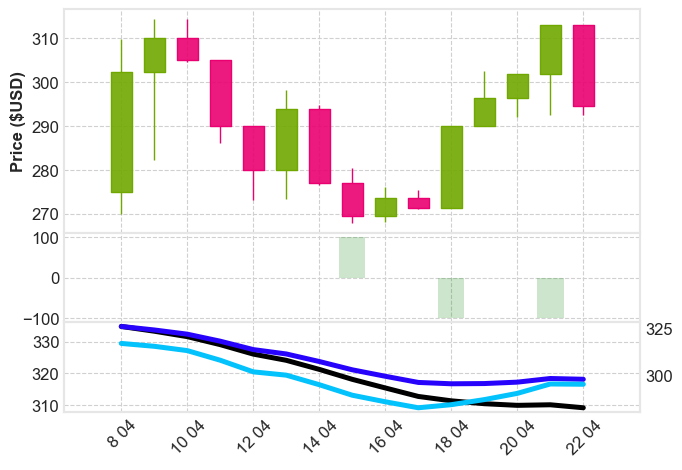

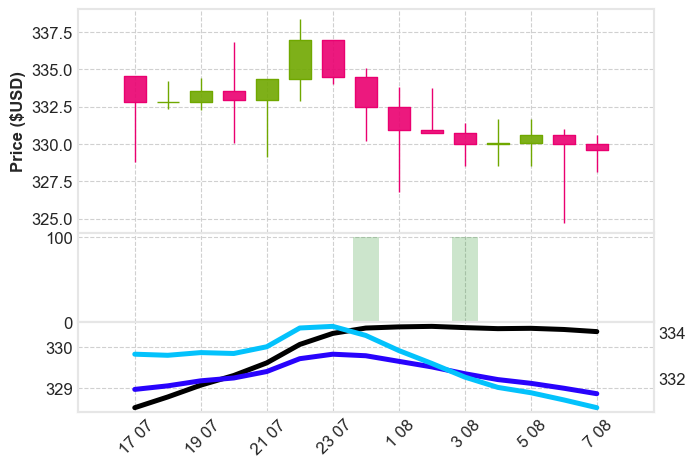

--------------------
--------------------


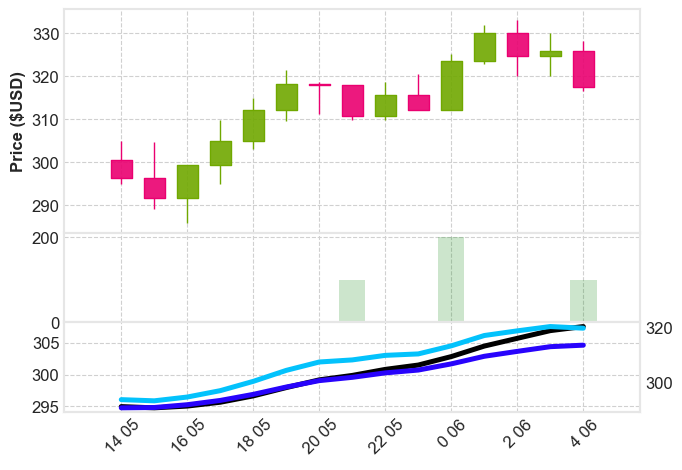

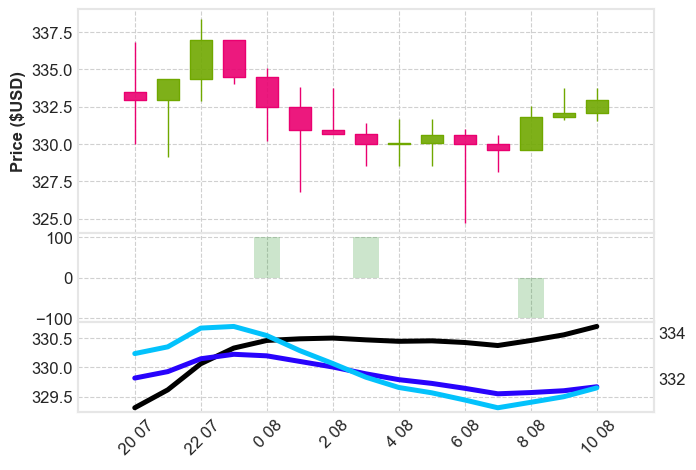

--------------------
--------------------


In [33]:
idxs_true = data[f"{pettern}_test"].loc[lambda x:x==True].index
idxs_false = data[f"{pettern}_test"].loc[lambda x:x==False].index
for i in range(10):
    idx_true = idxs_true[i]
    idx_false = idxs_false[i]
    
    for dt in [idx_true,idx_false]:
        sub = data.loc[dt-7: dt+7]
        sub.set_index("date",inplace=True)
        ap = [mpf.make_addplot(sub[pettern],type='bar',alpha=0.2,color="green",panel=1),
              mpf.make_addplot(sub.ema_1,type='line',alpha=1,color="black",panel=2),
              mpf.make_addplot(sub.ema_2,type='line',alpha=1,color="#2803fc",panel=2),
             mpf.make_addplot(sub.ema_3,type='line',alpha=1,color="#03c2fc",panel=2),]
        
        mpf.plot(sub, 
                 type='candle', 
                 addplot=ap, 
                 volume=False,
                 ylabel='Price ($USD)',
                 style='binance',
                datetime_format=' %-H %d',
                ) 
    
    print("-"*20)
    print("-"*20)




In [19]:
idxs_true = df[f"{pettern}_test"].loc[lambda x:x==True].index
idxs_false = df[f"{pettern}_test"].loc[lambda x:x==False].index

In [ ]:
len(idxs_false)

10

In [316]:
df["volatility"] = np.NaN

In [384]:
v_false = []
v_true = []
h = 7
for idx in idxs_true:
    vals = df.loc[idx-h:idx]
    v = volatility(vals,"dx_5")
    v_true.append(v)
    
for idx in idxs_false:
    vals = df.loc[idx-h:idx]
    v = volatility(vals,"dx_5")
    v_false.append(v)

print("v_ture :",np.mean(v_true))
print("v_false :",np.mean(v_false))

v_ture : 2.4481766342000686
v_false : 2.267029764367689


v_false : 2.267029764367689


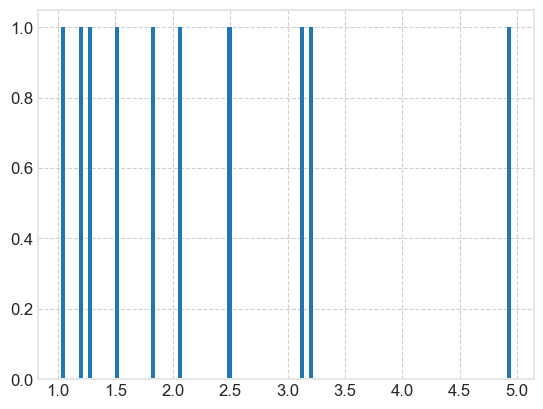

In [385]:
print("v_false :",np.mean(v_false))
plt.hist(v_false,bins=100)
plt.show()

v_ture : 2.4481766342000686


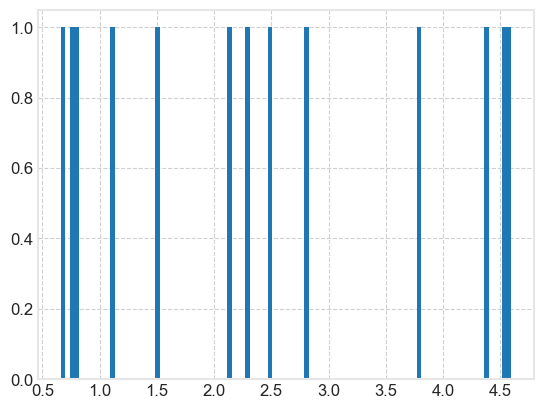

In [386]:
print("v_ture :",np.mean(v_true))
plt.hist(v_true,bins=100)
plt.show()

<BarContainer object of 1669 artists>

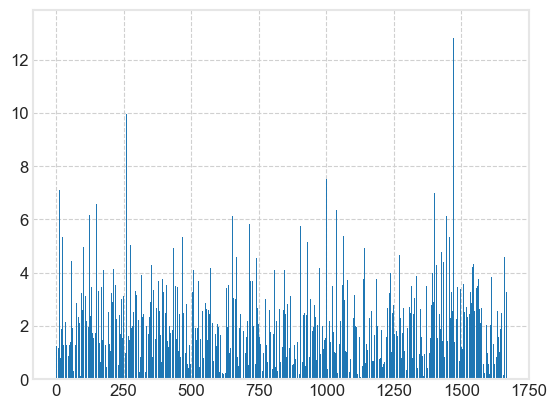

In [372]:
plt.bar(list(range(len(v_true))),v_true)

<BarContainer object of 4714 artists>

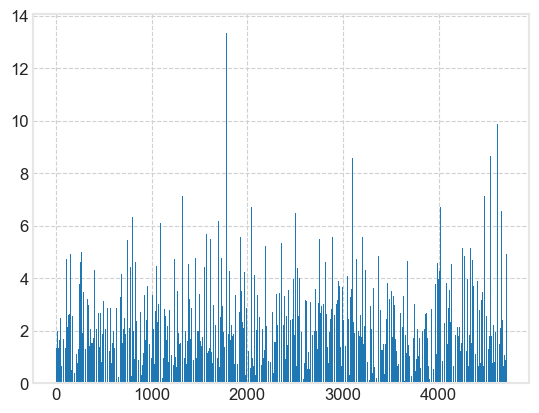

In [373]:
plt.bar(list(range(len(v_false))),v_false)

In [24]:
t = data[data[f"{pettern}_test"] == True]
f = data[data[f"{pettern}_test"] == False]
test_t = t[t["ema_1"] > t["ema_3"]]
test_f = f[f["ema_1"] > f["ema_3"]]

In [25]:
len(t)


13

In [416]:
len(t)/len(df)

0.00032409254088552056

In [26]:
len(test_f)

2

In [27]:
len(test_t)

10

In [28]:
len(test_t)/(len(test_f)+len(test_t))

0.8333333333333334